# Homework Session 3

## Exercise 3 (p.198, Chap.5)

a) Explain how k-fold cross-validation is implemented. <br>
Cross-validation is a resampling procedure and it is used for the evaluation of machine learning models over a limited data sample. The user has to insert just a parameter, k, the number of groups that a given data sample is to be split into. <br>
b) What are the advantages and disadvantages of k-fold crossvalidation
relative to: <br>
i. The validation set approach? <br>
ADV: You don't loose data that can be used to train the model. Resempling consists in re-using the same data by repeating the optimization over different samples to get the lowest loss in term of data training usage and improve performances.<br>
DISADV: Harder to implement in some situations, especially for beginners as it is easier to newcomers to divide the data in train, test and validation sets. <br>
ii. LOOCV? <br>
ADV: In KFOLD all observations are used for both training and validation, and each observation is used for validation exactly once. <br>
DISADV: If K = N LOOCV and KFOLD are equal.

## Exercise 8 (p.200, Chap.5) 

In [2]:
set.seed(1)
y <- rnorm(100)
x <- rnorm(100)
y <- x - 2 * x^2 + rnorm(100)

a) n = 100, p = 2. <br>
Model used: Y=X−2X^2+ε <br>
b)<br>

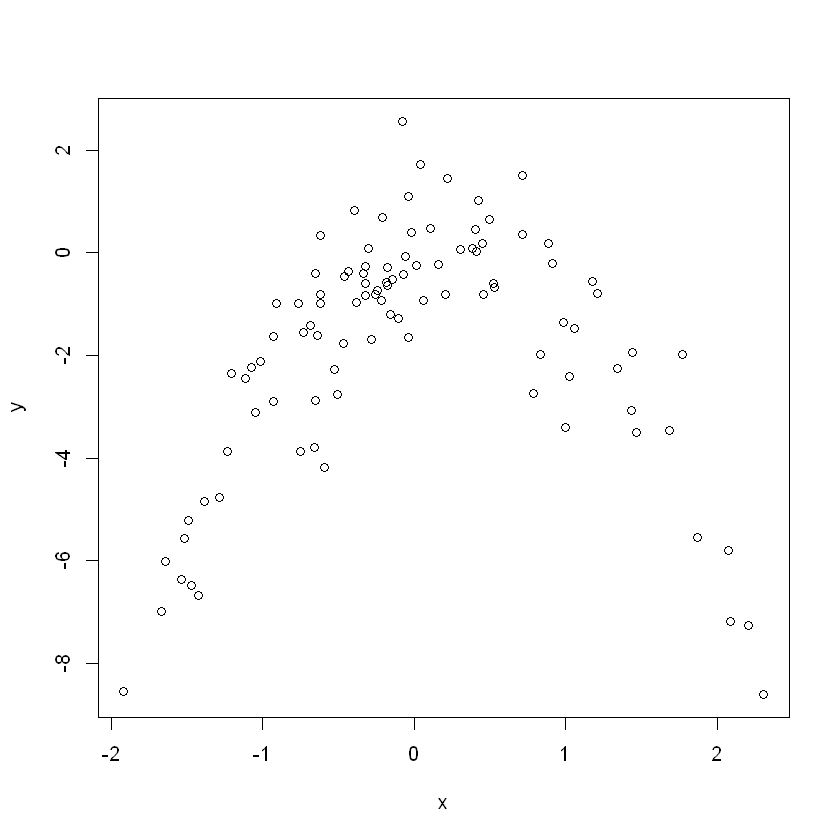

In [3]:
plot(x,y)

In [5]:
#c)
#i.
library(boot)
set.seed(1)
Data <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
cv.glm(Data, fit.glm.1)$delta[1]

[1] 5.890979

In [6]:
#ii.
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(Data, fit.glm.2)$delta[1]

[1] 1.086596

In [7]:
#iii.
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(Data, fit.glm.3)$delta[1]

[1] 1.102585

In [8]:
#iv.
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(Data, fit.glm.4)$delta[1]

[1] 1.114772

In [9]:
#d
set.seed(9)
fit.glm.1 <- glm(y ~ x)
cv.glm(Data, fit.glm.1)$delta[1]

[1] 5.890979

In [10]:
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(Data, fit.glm.2)$delta[1]

[1] 1.086596

In [11]:
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(Data, fit.glm.3)$delta[1]

[1] 1.102585

In [12]:
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(Data, fit.glm.4)$delta[1]

[1] 1.114772

Equal results as LOOCV keeps en consideration n folds of a single observation.

## Exercise 1 (p.259, Chap.6) 

a) During subset selection, the model with k predictors is the model that has the lowest RSS among all the models with k predictors. With  forward stepwise selection the model with k predictors is the model that has the smallest RSS among the p−k models. During backward stepwise selection, the model with k predictors is the model with the smallest RSS among the k models which contains all but one of the predictors in Mk+1. So, the model which has the smallest training RSS is the one that we get from best subset selection as it is the one selected among all k predictors models.
<br>
b) The best subset selection can reach the smallest test RSS because it considers more models than the other methods. The other methods can lead to a model that has a smaller test RSS randomly tho. <br>
c) <br>
i. True. The model that has k+1 predictors is the result of the increase of predictors in the model with k predictors with one additional predictor.
<br>
ii. True. The model with k predictors is obtained by removing one predictor from the model with k+1 predictors. <br>
iii. False. No connection between the models from forward and backward selection. <br>
iv. False. There is no direct link between the models obtained from forward and backward selection. <br>
v. False. The model with k+1 predictors is obtained by choosing among all possible models with k+1 predictors, so it doesn't necessarily contain all the predictors selected for the k-variable model.

## Exercise 9 (p.263, Chap.6)

In [13]:
#a)
library(ISLR)
data(College)
set.seed(11)
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train
College.train <- College[train, ]
College.test <- College[test, ]

Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [14]:
#b.
fit.lm <- lm(Apps ~ ., data = College.train)
pred.lm <- predict(fit.lm, College.test)
mean((pred.lm - College.test$Apps)^2)

[1] 1026096

In [16]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [17]:
#c.
train.mat <- model.matrix(Apps ~ ., data = College.train)
test.mat <- model.matrix(Apps ~ ., data = College.test)
grid <- 10 ^ seq(4, -2, length = 100)
fit.ridge <- glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge <- cv.glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 0.01

In [18]:
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
mean((pred.ridge - College.test$Apps)^2)

[1] 1026069

So the test is higher for Ridge.

In [19]:
#d.
fit.lasso <- glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

In [20]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - College.test$Apps)^2)

[1] 1026036

In [21]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)   37.86520037
(Intercept)    .         
PrivateYes  -551.14946609
Accept         1.74980812
Enroll        -1.36005786
Top10perc     65.55655577
Top25perc    -22.52640339
F.Undergrad    0.10181853
P.Undergrad    0.01789131
Outstate      -0.08706371
Room.Board     0.15384585
Books         -0.12227313
Personal       0.16194591
PhD          -14.29638634
Terminal      -1.03118224
S.F.Ratio      4.47956819
perc.alumni   -0.45456280
Expend         0.05618050
Grad.Rate      9.07242834

In [24]:
install.packages("pls")

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\avarnelli\AppData\Local\Temp\RtmpS0jGiw\downloaded_packages


In [25]:
library(pls)

Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



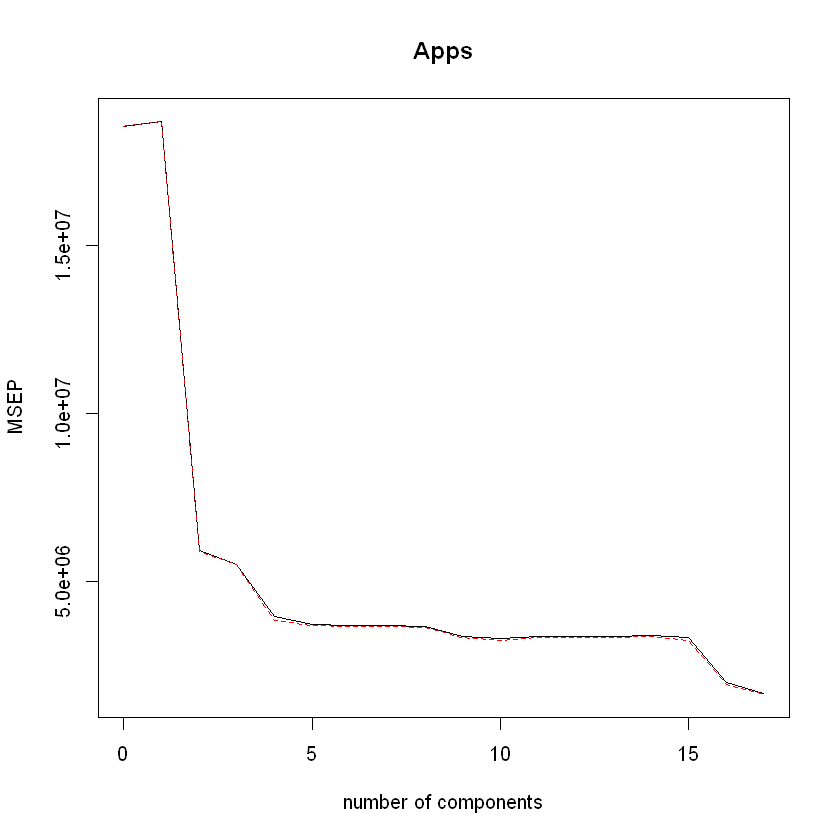

In [26]:
#e.
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fit.pcr, val.type = "MSEP")

In [27]:
pred.pcr <- predict(fit.pcr, College.test, ncomp = 10)
mean((pred.pcr - College.test$Apps)^2)

[1] 1867486

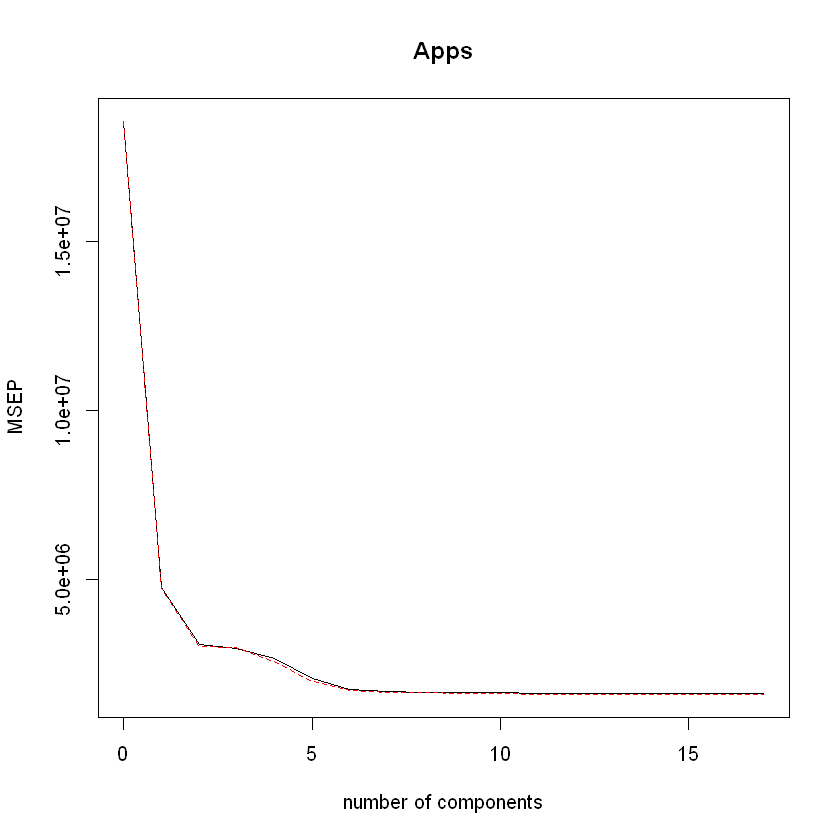

In [28]:
#f.
fit.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fit.pls, val.type = "MSEP")

In [29]:
pred.pls <- predict(fit.pls, College.test, ncomp = 10)
mean((pred.pls - College.test$Apps)^2)

[1] 1031287

In [30]:
#g.
test.avg <- mean(College.test$Apps)
lm.r2 <- 1 - mean((pred.lm - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
ridge.r2 <- 1 - mean((pred.ridge - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
lasso.r2 <- 1 - mean((pred.lasso - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pcr.r2 <- 1 - mean((pred.pcr - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pls.r2 <- 1 - mean((pred.pls - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)

In [31]:
lm.r2

[1] 0.9104228

In [32]:
ridge.r2

[1] 0.9104252

In [33]:
lasso.r2

[1] 0.910428

In [34]:
pcr.r2

[1] 0.8369703

In [35]:
pls.r2

[1] 0.9099696

So all the models are almost the same in terms of performance, but pcr.

## Exercise 9 (p.299, Chap.7)

In [36]:
#a.
library(MASS)
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)

Warning message:
"package 'MASS' was built under R version 3.6.3"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


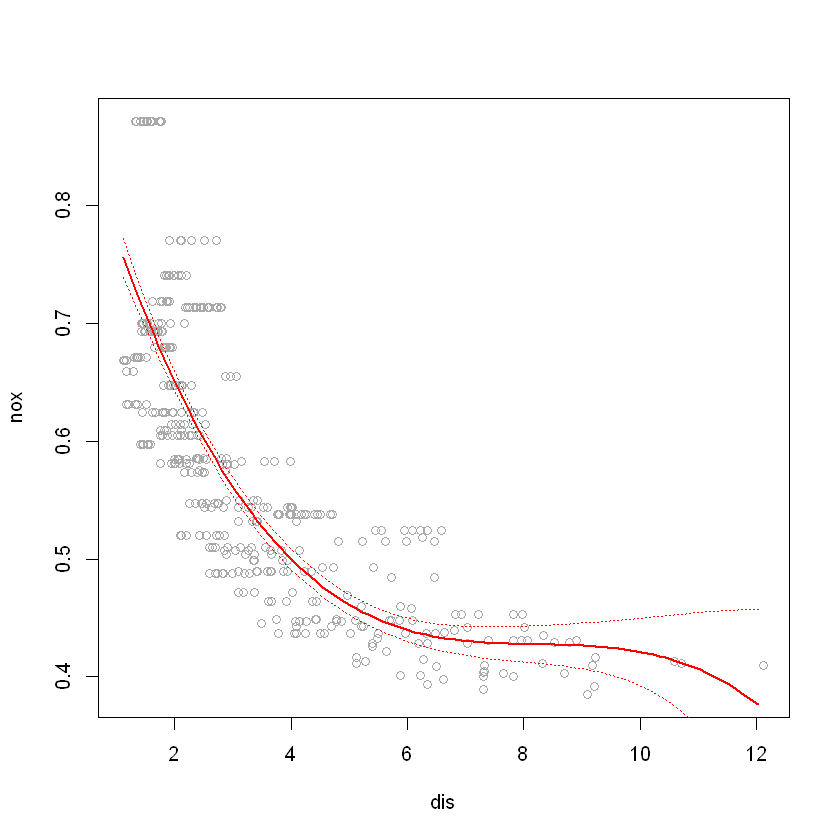

In [39]:
dis.grid <- seq(min(Boston$dis), max(Boston$dis), by = 0.1)
preds <- predict(fit, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2* preds$se.fit, preds$fit - 2 * preds$se.fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds$fit, lwd = 2, col = "red")
matlines(dis.grid, se.bands, lwd = 1, col = "red", lty = 3)

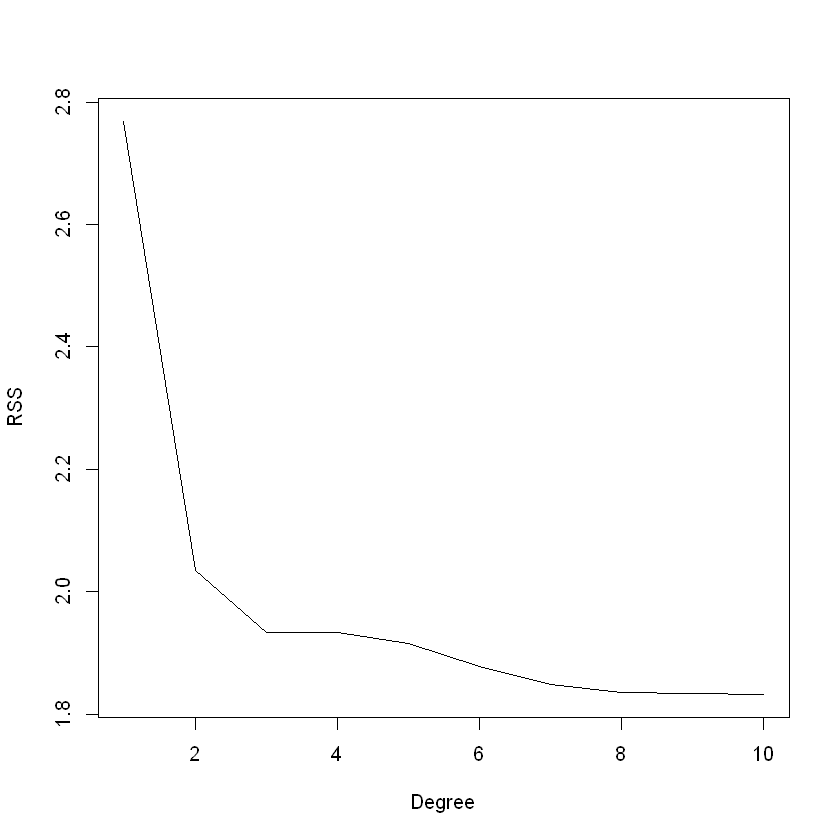

In [40]:
#b.
rss <- rep(NA, 10)
for (i in 1:10) {
  fit <- lm(nox ~ poly(dis, i), data = Boston)
  rss[i] <- sum(fit$residuals ^ 2)
}
plot(1:10, rss, type = 'l', xlab = "Degree", ylab = "RSS")

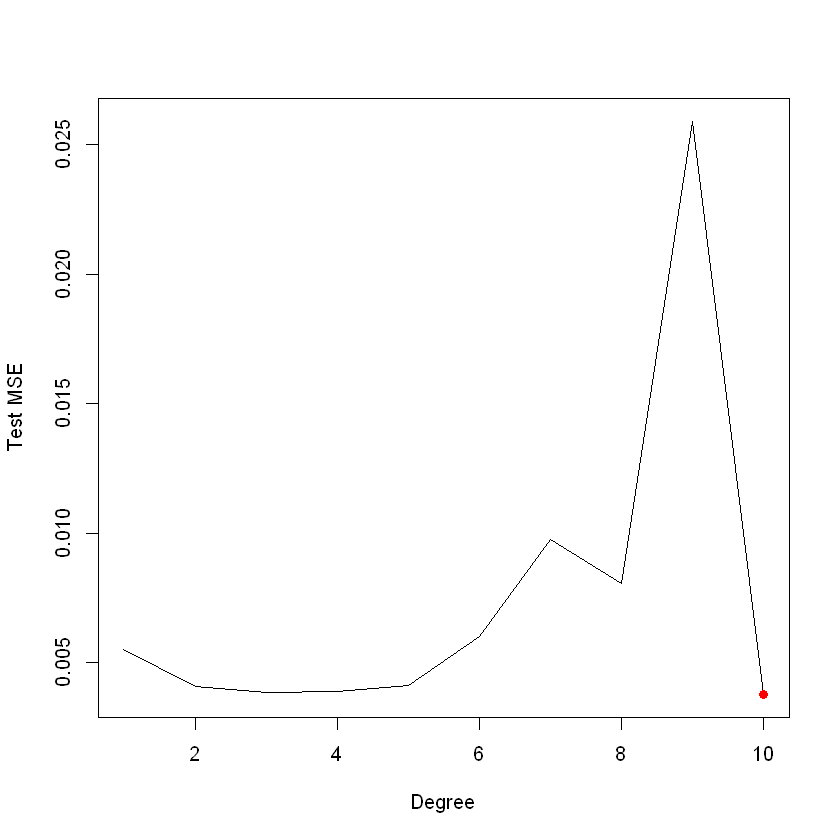

In [41]:
#c.
testMSE <- rep(NA, 10)
for (i in 1:10) {
  fit <- glm(nox ~ poly(dis, i), data = Boston)
  testMSE[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(1:10, testMSE, type = 'l', xlab = "Degree", ylab = "Test MSE")
points(which.min(testMSE), testMSE[which.min(testMSE)], col = 'red', pch = 19)

In [42]:
#d.
library(splines)
dof <- 4
fit <- lm(nox ~ bs(dis, df = dof), data = Boston)
attr(bs(Boston$dis, df = dof), "knots")

50% 
3.20745

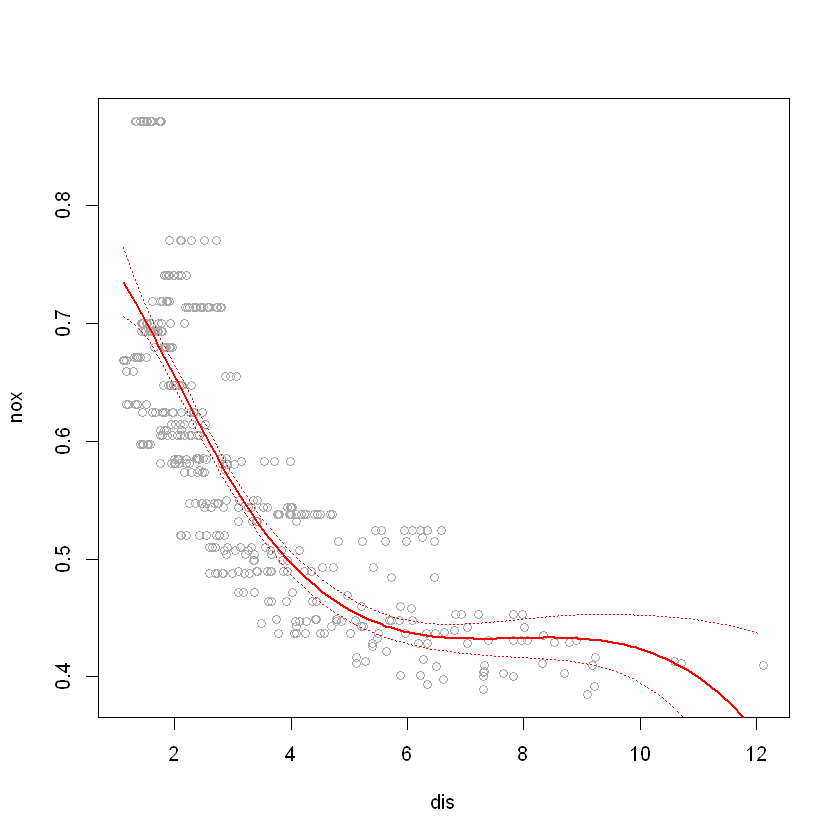

In [44]:
preds <- predict(fit, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2* preds$se.fit, preds$fit - 2 * preds$se.fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds$fit, lwd = 2, col = "red")
matlines(dis.grid, se.bands, lwd = 1, col = "red", lty = 3)

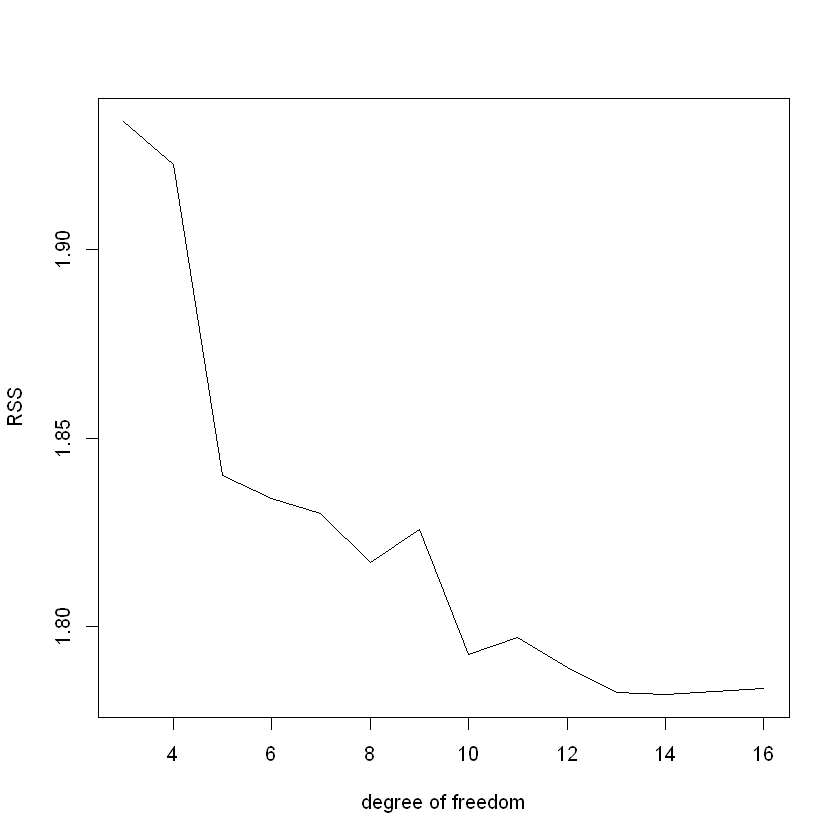

In [45]:
#e.
res <- c()
df.range <- 3:16
for (dof in df.range) {
  fit <- lm(nox ~ bs(dis, df = dof), data = Boston)
  res <- c(res, sum(fit$residuals ^ 2))
}
plot(df.range, res, type = 'l', xlab = 'degree of freedom', ylab = 'RSS')

So 10 is good.

In [46]:
#f.
res <- c()
for (dof in df.range) {
  fit <- glm(nox ~ bs(dis, df = dof), data = Boston)
  testMSE <- cv.glm(Boston, fit, K = 10)$delta[1]
  res <- c(res, testMSE)
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis,

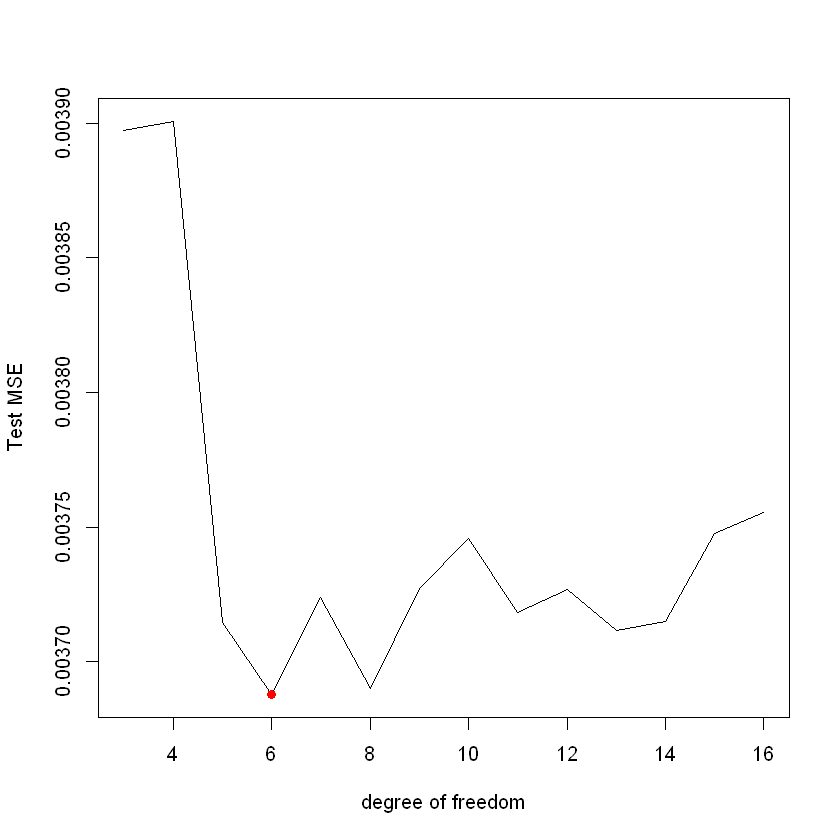

In [47]:
plot(df.range, res, type = 'l', xlab = 'degree of freedom', ylab = 'Test MSE')
points(which.min(res) + 2, res[which.min(res)], col = 'red', pch = 19)

So 6 is good choice.

## Exercise 10 (p.300, Chap.7)

In [52]:
install.packages("leaps")

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\avarnelli\AppData\Local\Temp\RtmpS0jGiw\downloaded_packages


In [53]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.3"

In [54]:
#a.
library(ISLR)
library(leaps)
train <- sample(1: nrow(College), nrow(College)/2)
test <- -train
fit <- regsubsets(Outstate ~ ., data = College, subset = train, method = 'forward')
fit.summary <- summary(fit)
fit.summary

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College, subset = train, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       " "  

In [55]:
coef(fit, id = 6)

(Intercept)    PrivateYes    Room.Board      Terminal   perc.alumni 
-4019.5247969  2658.5824701     0.8741529    35.9459474    45.7752296 
       Expend     Grad.Rate 
    0.2616486    35.0230529

In [58]:
install.packages("gam")


  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

  Binaries will be installed
package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\avarnelli\AppData\Local\Temp\RtmpS0jGiw\downloaded_packages


In [59]:
library(gam)

Warning message:
"package 'gam' was built under R version 3.6.3"Loaded gam 1.16.1



Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

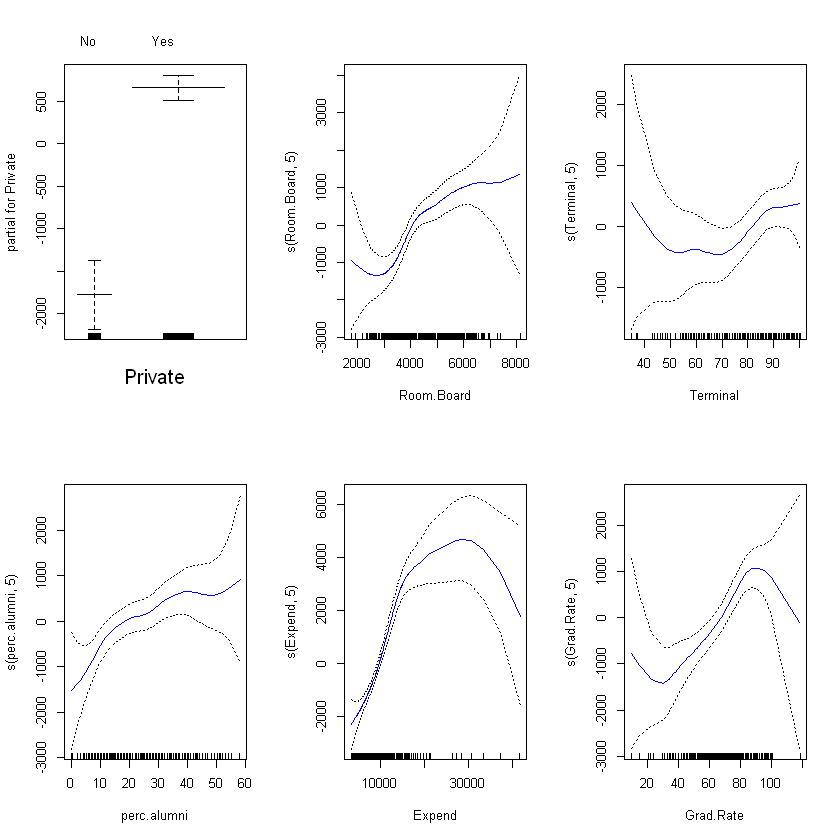

In [60]:
#b.
gam.mod <- gam(Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 5) + s(perc.alumni, 5) + s(Expend, 5) + s(Grad.Rate, 5), data = College, subset = train)
par(mfrow = c(2,3))
plot(gam.mod, se = TRUE, col = 'blue')

In [61]:
#c.
preds <- predict(gam.mod, College[test, ])
RSS <- sum((College[test, ]$Outstate - preds)^2) # based on equation (3.16)
TSS <- sum((College[test, ]$Outstate - mean(College[test, ]$Outstate)) ^ 2)
1 - (RSS / TSS)   # based on equation

[1] 0.7769703

So R2 statistic for the test set is 0.77.

In [62]:
#d.
summary(gam.mod)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 
    5) + s(perc.alumni, 5) + s(Expend, 5) + s(Grad.Rate, 5), 
    data = College, subset = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7264.48 -1068.90    16.88  1258.34  7477.71 

(Dispersion Parameter for gaussian family taken to be 3735617)

    Null Deviance: 6373312289 on 387 degrees of freedom
Residual Deviance: 1348555250 on 360.9994 degrees of freedom
AIC: 7000.88 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 1716753181 1716753181 459.563 < 2.2e-16 ***
s(Room.Board, 5)    1 1256652433 1256652433 336.398 < 2.2e-16 ***
s(Terminal, 5)      1  425534617  425534617 113.913 < 2.2e-16 ***
s(perc.alumni, 5)   1  269049398  269049398  72.023 5.578e-16 ***
s(Expend, 5)        1  537919762  537919762 143.998 < 2.2e-16 ***
s(Grad.Rate, 5)     1  122654026  122654026  32.834 2.

Anova result for Nonparametric Effects shows that Expend has strong non-linear relationshop with the Outstate. Grad.Rate and PhD have moderate non-linear relationship with the Outstate, which matches the result of (b).